# Hospital Readmission Prediction
The aim of this project is to predict how likely diabetes patients are to readmit to hospitals. According to a survey at least 5-10% of diabetes patients readmit to a hospital due various reasons. Our goal is to assess the risk of readmission in diabetes patients within 30 days of a hospital discharge by understanding various features thats affecting the discharge. Predicting readmission risk and understanding its causes are thus essential for hospital resource allocation and quality improvement planning.

Predicting readmission risk and understanding its causes are essential for hospital resource allocation and quality improvement planning.
According to a survey at least 5-10% of diabetes patients are readmitted to hospital due to various reasons. 

The aim of this project is to predict how likely diabetes patients are to be readmitted to hospital. 
Specifically, we will look at the risk of readmission in diabetes patients within 30 days of a hospital discharge, by understanding various features affecting the discharge. 

The data used for this analysis is from [UCI repo](https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008). 
The dataset represents 10 years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. It includes over 50 features representing patient and hospital outcomes. 


In the cell below we import the python libraries that we will use throughout the notebook.

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
from project_lib import Project
project = Project()

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

Steps to prepare the data
1. Import the data sets required for the analysis and merge the datasets.
3. Map the column headers to values.
4. Handle null values.
5. Filter the data based on matching conditions
6. Map Diagnoses types using icd-9 codes.
6. Handle target column 

### 1. Import the datasets
The raw dataset `diabetic_data.csv` contains all patients personal, hospital admission/discharge and medication details in it. The data was downloaded from [UCI repo](https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008#).

In [2]:
hospital_details = project.get_file("diabetic_data.csv")
hospital_details.seek(0)
df_hospital = pd.read_csv(hospital_details)

df_hospital.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


The `patient-data.csv` is a subset of above dataset. It contains patient numbers and their names. Only the patients available in this dataset are used for further analysis.

In [3]:
patient_details = project.get_file("patient-data.csv")
patient_details.seek(0)
df_patient = pd.read_csv(patient_details)

df_patient.head()


,patient_nbr,first_name,last_name
0,135,Lily,Prohaska
1,378,Loyce,Mraz
2,927,Kade,Bayer
3,1305,Alivia,Rohan
4,4302,Sterling,Runolfsdottir


The above 2 datasets are joined to filter the raw data with patient details available in patient data.

In [4]:
## Join two datasets to filter the patients
df_diag=pd.merge(df_hospital,df_patient,on="patient_nbr",how="inner")
df_diag.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,first_name,last_name
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,Ima,Labadie
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,Brycen,Hermiston
2,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,Leonor,Cummerata
3,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,Nicolas,Baumbach
4,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,?,?,31,6,16,0,0,0,414,411,250,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30,Deshawn,Ryan


### 2. Map Column headers
The data source contains a set of decriptions for the columns. The below dictionaries are used to map the column values.

In [5]:
discharge_disp_dict={1:"Discharged to home",
2:"Discharged/transferred to another short term hospital",
3:"Discharged/transferred to SNF",
4:"Discharged/transferred to ICF",
5:"Discharged/transferred to another type of inpatient care institution",
6:"Discharged/transferred to home with home health service",
7:"Left AMA",
8:"Discharged/transferred to home under care of Home IV provider",
9:"Admitted as an inpatient to this hospital",
10:"Neonate discharged to another hospital for neonatal aftercare",
11:"Expired",
12:"Still patient or expected to return for outpatient services",
13:"Hospice/home",
14:"Hospice/medical facility",
15:"Discharged/transferred within this institution to Medicare approved swing bed",
16:"Discharged/transferred/referred another institution for outpatient services",
17:"Discharged/transferred/referred to this institution for outpatient services",
18:"Unknown",
19:"Expired at home. Medicaid only, hospice.",
20:"Expired in a medical facility. Medicaid only, hospice.",
21:"Expired, place unknown. Medicaid only, hospice.",
22:"Discharged/transferred to another rehab fac including rehab units of a hospital .",
23:"Discharged/transferred to a long term care hospital.",
24:"Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.",
25:"Unknown",
26:"Unknown",
30:"Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere",
27:"Discharged/transferred to a federal health care facility.",
28:"Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital",
29:"Discharged/transferred to a Critical Access Hospital (CAH)."}

admission_type_dict={1:'Emergency',
2:'Urgent',
3:'Elective',
4:'Newborn',
5:'Not Available',
6:'Not Available',
7:'Trauma Center',
8:'Not Mapped'}

admission_src_dict={1:"Physician Referral",
2:"Clinic Referral",
3:"HMO Referral",
4:"Transfer from a hospital",
5:"Transfer from a Skilled Nursing Facility (SNF)",
6:"Transfer from another health care facility",
7:"Emergency Room",
8:"Court/Law Enforcement",
9:"Not Available",
10:"Transfer from critial access hospital",
11:"Normal Delivery",
12:"Premature Delivery",
13:"Sick Baby",
14:"Extramural Birth",
15:"Not Available",
17:"Not Available",
18:"Transfer From Another Home Health Agency",
19:"Readmission to Same Home Health Agency",
20:"Not Available",
21:"Not Available",
22:"Transfer from hospital inpt/same fac reslt in a sep claim",
23:"Born inside this hospital",
24:"Born outside this hospital",
25:"Transfer from Ambulatory Surgery Center",
26:"Transfer from Hospice"}

In [6]:
df_diag['discharge_disposition_id']=df_diag['discharge_disposition_id'].map(discharge_disp_dict)
df_diag['admission_source_id']=df_diag['admission_source_id'].map(admission_src_dict)

df_diag['admission_type_id']=df_diag['admission_type_id'].map(admission_type_dict)


### 3. Handle Null records
Nulls are represented by `?`. Replace `?` by null records.
Some columns require specific values to be replaced in the null columns

In [7]:
df_diag=df_diag.replace("?",np.nan)

df_diag.race.fillna("Unknown",inplace=True)
df_diag.weight.fillna("Unknown",inplace=True)
df_diag.admission_type_id.fillna("Unknown",inplace=True)
df_diag.discharge_disposition_id.fillna("Unknown",inplace=True)
df_diag.admission_source_id.fillna("Unknown",inplace=True)
df_diag.payer_code.fillna("OTHER",inplace=True)
df_diag.diag_1.fillna("000",inplace=True)
df_diag.diag_2.fillna("000",inplace=True)
df_diag.diag_3.fillna("000",inplace=True)

### 4. Filter the data
1. Remove the patients with discharge disposition is `expired` or similar
2. At least one of the diagnosis types is diabetes(ICD-9 code starts with 250)
3. Drop duplicate entry to keep only the latest patient records.

In [8]:
df_diag=df_diag[~df_diag.discharge_disposition_id.isin(['Hospice / medical facility','Expired','Hospice / home','Expired in a medical facility. Medicaid only, hospice.','Expired at home. Medicaid only, hospice.'])]
df_diag=df_diag[df_diag.diag_1.str.startswith('250')|df_diag.diag_2.str.startswith('250')|df_diag.diag_3.str.startswith('250')]
df_diag=df_diag.drop_duplicates(subset ="patient_nbr",keep ='last')


### 5. Identify Diagnosis types

1. Remove the diagnosis types starts with `V` and `E`
2. Convert Diagnosis columns to float type
3. Map diagnosis codes to diagnosis string using a dictionary of icd-9 codes and the diagnosis types.

In [9]:
df_diag=df_diag[~df_diag.diag_1.str.startswith("V")]
df_diag=df_diag[~(df_diag.diag_2.str.startswith("V")|df_diag.diag_2.str.startswith("E"))]
df_diag=df_diag[~(df_diag.diag_3.str.startswith("V")|df_diag.diag_3.str.startswith("E"))]
df_diag.diag_1=df_diag.diag_1.astype('float64')
df_diag.diag_2=df_diag.diag_2.astype('float64')
df_diag.diag_3=df_diag.diag_3.astype('float64')

In [10]:

icd9coderange_dict = [(1, 140), (140, 240), (240, 280), (280, 290), (290, 320), (320, 390), 
               (390, 460), (460, 520), (520, 580), (580, 630), (630, 680), (680, 710),
               (710, 740), (740, 760), (760, 780), (780, 800), (800, 1000), (1000, 2000)]



diagnosis_dict = {0: 'Infectious And Parasitic', 1: 'Neoplasms', 2: 'Endocrine, Nutritional And Metabolic', 3: 'Blood Related/Diabetes',
             4: 'Mental', 5: 'Nervous System And Sense Organs', 6: 'Circulatory System', 7: 'Respiratory System',
             8: 'Digestive System', 9: 'Genitourinary System', 10: 'Pregnancy, Childbirth, And The Puerperium', 11: 'Skin And Subcutaneous Tissue', 
             12: 'Musculoskeletal System And Connective Tissue', 13: 'Congenital', 14: 'Prenatal', 15: 'Ill-Defined Conditions',
             16: 'Injury And Poisoning', 17: 'Misc'}


for num, cat_range in enumerate(icd9coderange_dict):
    df_diag['diag_1'] = np.where(df_diag['diag_1'].between(cat_range[0],cat_range[1]), num, df_diag['diag_1'])
    df_diag['diag_2'] = np.where(df_diag['diag_2'].between(cat_range[0],cat_range[1]), num, df_diag['diag_2'])
    df_diag['diag_3'] = np.where(df_diag['diag_3'].between(cat_range[0],cat_range[1]), num, df_diag['diag_3'])
    

df_diag['diag_1'] = df_diag['diag_1']
df_diag['diag_1'] = df_diag['diag_1'].replace(diagnosis_dict)

df_diag['diag_2'] = df_diag['diag_2']
df_diag['diag_2'] = df_diag['diag_2'].replace(diagnosis_dict)

df_diag['diag_3'] = df_diag['diag_3']
df_diag['diag_3'] = df_diag['diag_3'].replace(diagnosis_dict)

### 6. Handle target column
The target column `readmitted` contains 3 different values 
1. `No` - indicates patient is not readmitted.
2. `>30` - indicates patient is readmitted after 30 days.
3. `<30` - indicates patient is readmitted within 30 days.

In this analysis, we are interested in assesing the risk of readmission within 30 days of discharge, hence we re-classify the patients with more than 30 days readmissions as 'Not Readmitted'.


In [11]:
readmit_dict={"NO":0,
              ">30":0,
              "<30":1
             }
df_diag['readmitted']=df_diag['readmitted'].map(readmit_dict)



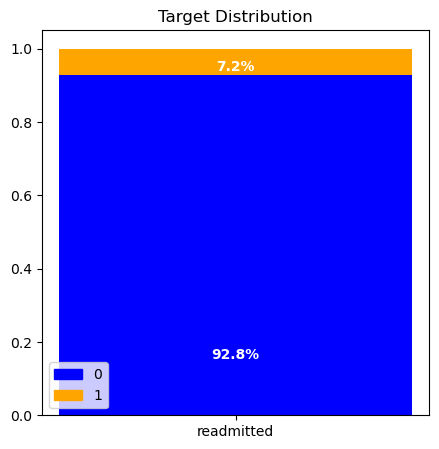

In [12]:

target_col='readmitted'
df_temp = df_diag[target_col].value_counts().reset_index()
df_temp['perc'] = df_temp[target_col] / df_temp[target_col].sum()

target_0 = df_temp[df_temp['index']==0]['perc'].values[0]
target_1 = df_temp[df_temp['index']==1]['perc'].values[0]

fig1, ax1 = plt.subplots(figsize=(5,5))

ax1.bar(target_col, target_0, label=target_0, color='blue')
ax1.bar(target_col, target_1, bottom=target_0, color='orange')

red_patch = mpatches.Patch(color='orange', label='1')
blue_patch = mpatches.Patch(color='blue', label='0')

plt.legend(handles=[blue_patch, red_patch], loc='best')

plt.title('Target Distribution')

for patch in ax1.patches:
    percentage = '{:.1f}%'.format(100 * patch.get_height())
    x = patch.get_x() + patch.get_width()/2
    y = patch.get_y() + patch.get_height()/6
    ax1.annotate(percentage, (x, y), ha='center', color='white', weight='bold', fontsize=10)

In [13]:

df_diag.columns=[x.upper() for x in df_diag.columns.tolist()]
project.save_data('training-data.csv', df_diag.to_csv(index=False), overwrite=True)

{'file_name': 'training-data.csv',
 'message': 'File saved to project storage.',
 'asset_id': 'b6bbde17-0fb3-4a4c-ad8e-e526ac0ccf1a'}

The data is prepared and stored in data assets in the file `training-data.csv`. This data can be used in auto-ai pipeline to predict hospital readissions.
This data set is used in `2-model-training-and-deployments` to predict and deploy hospital readissions using sci-kit and wml libraries.

**Sample Materials, provided under license. <br>
Licensed Materials - Property of IBM. <br>
© Copyright IBM Corp. 2021, 2022. All Rights Reserved. <br>
US Government Users Restricted Rights - Use, duplication or disclosure restricted by GSA ADP Schedule Contract with IBM Corp. <br>**